In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Créez la matrice augmentée X, comme vu en cours

In [186]:
# data generation -------------------
X=np.random.uniform(0,10,(100,1))
X=np.concatenate((X, np.ones((100,1))),axis=1)

# 2. Calculez le vecteur y à partir de X et de u

In [187]:
# noise generation -------------------
true_param=np.array([[4],[2]])
N = np.random.normal(0,5,(100,1))
y=X@true_param+N

# 3. Affichez le nuage de points résultant sur un graphique

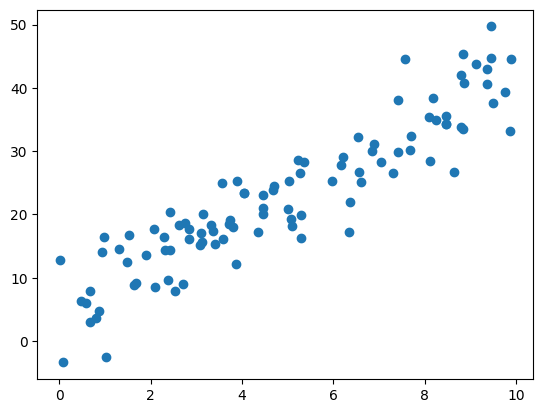

In [188]:
plt.scatter(X[:,0],y)

# 4. Calculez les paramètres de régression linéaire sur ces données en utilisant la méthode des moindres carrés ordinaires

In [189]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
w

array([[3.68380449],
       [4.88645391]])

In [190]:
y_predi=X@w

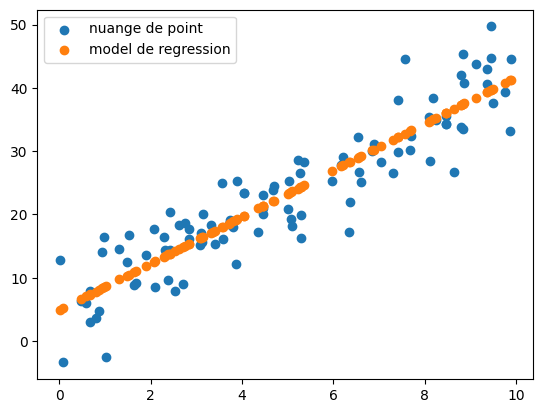

In [191]:
plt.scatter(X[:,0],y,label='nuange de point')
plt.scatter(X[:,0],y_predi,label='model de regression')
plt.legend()

In [192]:
errer=0.5*np.linalg.norm(y-y_predi)**2
errer

np.float64(1023.2069349281545)

## On voit que la droite de regression passe par le milieu des points c'est à dire elle minimise sa distance avec l'ensemble des points 

# 2 Régression linéaire multiple

In [193]:
filename = "./prostate.csv"
df = pd.read_csv(filename , delimiter=";")
df

,idx,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.430783,T
1,2,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
2,3,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-0.162519,T
3,4,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
4,5,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,1.255920,0.577607,0.555266,-1.024706,1.892548,1.073572,0.342627,1.262889,4.385147,T
93,94,2.096506,0.625489,-2.668323,-1.024706,1.892548,1.679542,0.342627,0.553770,4.684443,T
94,95,1.321402,-0.543304,-1.593794,-1.024706,1.892548,1.890377,0.342627,-0.509907,5.143124,F
95,96,1.300290,0.338384,0.555266,1.004813,1.892548,1.242632,0.342627,1.972007,5.477509,T


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     float64
 4   lbph     97 non-null     float64
 5   svi      97 non-null     float64
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     float64
 8   pgg45    97 non-null     float64
 9   lpsa     97 non-null     float64
 10  train    97 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [195]:
df['train'].unique()

array(['T', 'F'], dtype=object)

In [196]:
df.columns

Index(['idx', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45', 'lpsa', 'train'],
      dtype='object')

# 2. Créez deux sous-ensembles de données, pour l’apprentissage et pour le test :

In [197]:
X_train=df[df['train']=='T']
Y_train=df[df['train']=='T']['lpsa']
X_test=df[df['train']=='F']
Y_test=df[df['train']=='F']['lpsa']
X_train=X_train[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45']]
X_test=X_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45']]
print(f"Trainset: n = {X_train.shape [0]} inst., d = {X_train.shape [1]} feat.")
...
print(f"Testset: m = {X_test.shape [0]} inst., d = {X_test.shape [1]} feat.")

Trainset: n = 67 inst., d = 8 feat.
Testset: m = 30 inst., d = 8 feat.


# 3. Calculez les paramètres du modèle de régression linéaire sur les données d’apprentissage

In [198]:
X_train=np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test=np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

In [199]:
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)),np.dot(X_train.T, Y_train))
w

array([ 0.67952814,  0.26305307, -0.14146483,  0.21014656,  0.3052006 ,
       -0.28849277, -0.02130504,  0.26695576,  2.46493292])

In [200]:
print(f'w = {w[:-1]} et b={w[-1]}')

w = [ 0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006  -0.28849277
 -0.02130504  0.26695576] et b=2.4649329221237446


## On a les meme valeurs que le tableau

# 5. Utilisez le modèle résultant pour prédire les valeurs de y pour les données de test

In [201]:
y_predi_test=X_test@w

# 6. Calculez l’erreur quadratique moyenne (MSE) sur les données de test, ainsi que l’écart-type correspondant

In [202]:
erreu_quadratiq=(Y_test-y_predi_test)**2
MSE=np.mean(erreu_quadratiq)
print(f'MSE = {MSE}')

MSE = 0.5212740055076


In [203]:
ecart_type=np.std(erreu_quadratiq)/np.sqrt(len(erreu_quadratiq))
print(f'Ecart-Type = {ecart_type}')

Ecart-Type = 0.17571997412729787


# 3 Régression polynomiale

In [204]:
#data generation -------------------
def generateur(debut,fin):
    X=np.random.uniform(debut,fin,(100,))
    # noise generation -------------------
    N = np.random.normal(0,2000,(100,))
    # build the polynomial -------------------
    a = np.random.uniform(-2, 2, (7,))
    f = np.poly1d(a)
    Y = f(X) + N
    return X,Y

# 2. Affichez le nuage de points résultant sur un graphique

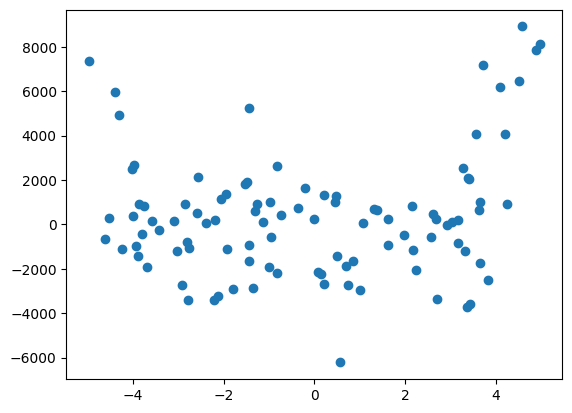

In [205]:
# data visualization -------------------
X,Y=generateur(-5,5)
plt.scatter(X,Y)

# 3. En utilisant la méthode polyfit de Numpy, calculez les paramètres du modèle de régression polynomiale de degré 1

In [206]:
w = np.polyfit(X,Y,1)
h=np.poly1d(w)
h

poly1d([167.7575143 , 382.32011865])

# 4. Affichez le nuage de points et le modèle de régression polynomiale sur un même graphique

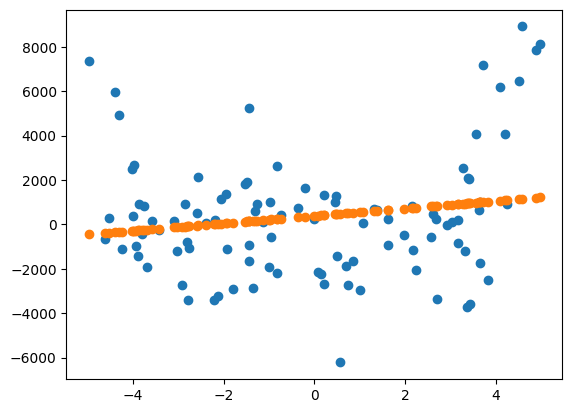

In [207]:
y_pred=h(X)
plt.scatter(X,Y)
plt.scatter(X,y_pred)

# 5. Faites de même pour des modèles de degré 7 et 25

In [208]:
def visual_degre_et_25(X,Y):
    plt.subplots(1,2,figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title('Degré 7')
    w = np.polyfit(X,Y,7)
    h=np.poly1d(w)
    y_pred=h(X)
    plt.scatter(X,Y)
    plt.scatter(X,y_pred)
    erreu_quadratiq=(Y-y_pred)**2
    MSE=np.mean(erreu_quadratiq)
    plt.title(f'Dergré 7 : Erreur quadratique moyenne = {np.round(MSE,3)}')
    plt.subplot(1,2,2)
    plt.title('Degré 25')
    w = np.polyfit(X,Y,25)
    h=np.poly1d(w)
    y_pred=h(X)
    erreu_quadratiq=(Y-y_pred)**2
    MSE=np.mean(erreu_quadratiq)
    plt.title(f'Dergré 25 : Erreur quadratique moyenne = {np.round(MSE,3)}')
    plt.scatter(X,Y)
    plt.scatter(X,y_pred)
    plt.show()

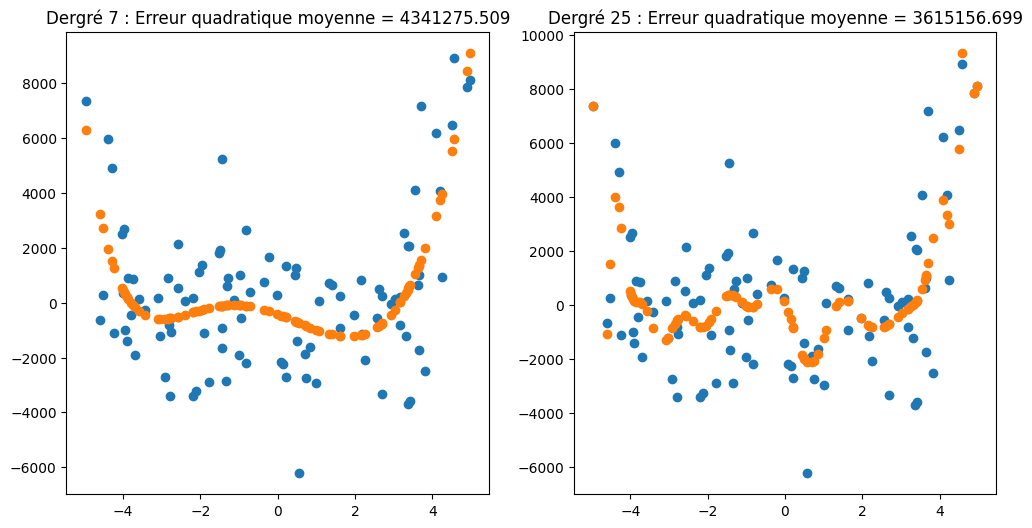

In [209]:
visual_degre_et_25 (X,Y)

# 6. Reproduisez le test plusieurs fois, avec plusieurs générations aléatoires différentes et donnez votre analyse des résultats obtenus ?

In [210]:
X,Y=generateur(-3,3)

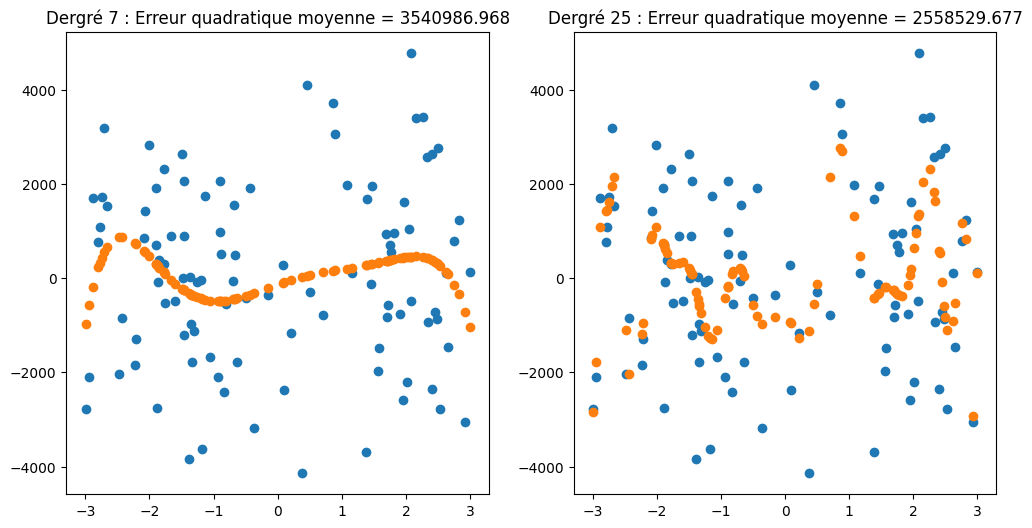

In [211]:
visual_degre_et_25 (X,Y)

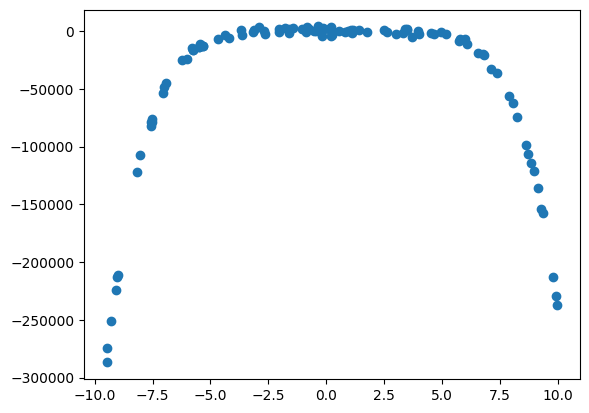

In [212]:
X,Y=generateur(-10,10)
plt.scatter(X,Y)

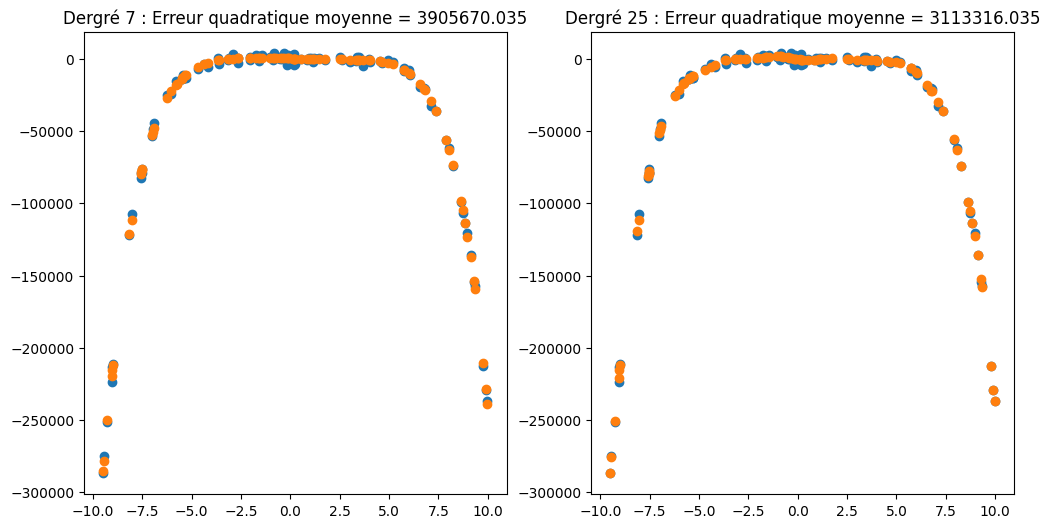

In [213]:
visual_degre_et_25(X,Y)

### On voit que plus les données sont complexe plus les modéles ont du mal à les predire et plus ils font plus d'erreur. Le modele de degré 25 s'adapte plus aux données complexe que le modele de degré 7 

# 7. Calculez l’erreur quadratique moyenne pour chaque modèle et comparez les résultats obtenus

### Les erreurs quadratique moyenne sont calculées et afficher en haut de chaque figure. On voit que les erreur quadratiques moyenne ont une ordre de gradeur trés grande à cause des degrés elevés des modeles. Avec cet ordre de gradeur des erreurs il est peu difficile de mesurer la performance des modedéles mais on peut remarqués  que le modéle de degré 25 est plus elevé que celui de degré 7